# İstanbul kiralık ev fiyat tahmin modeli

### Verilerin Okunması

In [181]:
import pandas as pd
import numpy as np 
import seaborn as sea 
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [182]:
df_raw = pd.read_csv('ilanlar.csv')
df_raw.head(5)

,img-link href,photo-count,list-view-price,list-view-date,left,celly,celly 2,celly 3,celly 4,eids-badge__description,he-lazy-image src,eids-badge__label,list-view-location,img-wrp href,he-lazy-image src 2,he-lazy-image src 3,wp-btn,listing-card--owner-info__firm-name,listing-card--owner-info__name,list-view-header
0,https://www.hepsiemlak.com/istanbul-kadikoy-ca...,31.0,350.000,18-05-2025,Kiralık Daire,5 +\n 2,360 m²,6\n Yaşında,4. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,EİDS onaylı,İstanbul / Kadıköy / Caddebostan Mah.,https://www.hepsiemlak.com/emlak-ofisi/versati...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Whatsapp,Versatıe Selenıum Twins Zorlu Center,Sinan\n Çizmeci,NaN
1,https://www.hepsiemlak.com/istanbul-sisli-tesv...,13.0,125.000,18-05-2025,Kiralık Residence,1 +\n 1,90 m²,Sıfır Bina,8. Kat,NaN,https://hecdnnw.hemlak.com/mncropresize/77/67/...,NaN,İstanbul / Şişli / Teşvikiye Mah.,https://www.hepsiemlak.com/emlak-ofisi/versati...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,NaN,Whatsapp,Versatıe Selenıum Twins Zorlu Center,Sinan\n Çizmeci,NaN
2,https://www.hepsiemlak.com/istanbul-bagcilar-1...,25.0,29.990,18-05-2025,Kiralık Daire,1 +\n 1,75 m²,Sıfır Bina,1. Kat,NaN,https://hecdnnw.hemlak.com/mncropresize/77/67/...,NaN,İstanbul / Bağcılar / 15 Temmuz Mah.,https://www.hepsiemlak.com/emlak-ofisi/uzmanla...,NaN,NaN,Whatsapp,Uzmanlar Gayrimenkul,NaN,NaN
3,https://www.hepsiemlak.com/istanbul-kagithane-...,23.0,26.500,18-05-2025,Kiralık Daire,2 +\n 1,95 m²,5\n Yaşında,1. Kat,NaN,https://hecdn01.hemlak.com/mncropresize/280/21...,NaN,İstanbul / Kağıthane / Sultan Selim Mah.,https://www.hepsiemlak.com/emlak-ofisi/serhat-...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Whatsapp,Serhat İnşaat Ve Gayrimenkul,Serhat\n Durmazer,NaN
4,https://www.hepsiemlak.com/istanbul-zeytinburn...,29.0,150.000,17-05-2025,Kiralık Daire,3 +\n 1,183 m²,3\n Yaşında,10. Kat,Elektronik İlan Doğrulama Sistemi yetki doğrul...,https://hecdn01.hemlak.com/mncropresize/280/21...,EİDS onaylı,İstanbul / Zeytinburnu / Kazlıçeşme Mah.,https://www.hepsiemlak.com/emlak-ofisi/kurtulu...,https://hecdn01.hemlak.com/img/eids-logo-mini.png,https://hecdnnw.hemlak.com/mncropresize/77/67/...,Whatsapp,Kurtuluş Emlak,NaN,NaN


In [183]:
col = list(df_raw.columns)


In [184]:
df_raw.drop(['img-link href','photo-count','left','eids-badge__description','he-lazy-image src','eids-badge__label','img-wrp href','he-lazy-image src 2','he-lazy-image src 3','wp-btn','listing-card--owner-info__firm-name','listing-card--owner-info__name','list-view-header'],axis=1,inplace=True)


In [185]:
df_raw.sample(10)

,list-view-price,list-view-date,celly,celly 2,celly 3,celly 4,list-view-location
1437,20.000,17-05-2025,Stüdyo,60 m²,44\n Yaşında,2. Kat,İstanbul / Beşiktaş / Sinanpaşa Mah.
2035,12.000,05-05-2025,2 +\n 1,100 m²,4\n Yaşında,Yüksek Giriş,İstanbul / Esenyurt / Pınar Mah.
1357,70.000,17-05-2025,2 +\n 1,110 m²,5\n Yaşında,Yüksek Giriş,İstanbul / Beyoğlu / Ömer Avni Mah.
1739,30.000,17-05-2025,3 +\n 1,120 m²,30\n Yaşında,3. Kat,İstanbul / Üsküdar / Zeynep Kamil Mah.
4836,21.500,15-05-2025,2 +\n 1,90 m²,12\n Yaşında,16. Kat,İstanbul / Esenyurt / Zafer Mah.
3776,15.000,07-05-2025,2 +\n 1,68 m²,15\n Yaşında,Yüksek Giriş,İstanbul / Sultangazi / Gazi Mah.
598,47.000,16-05-2025,2 +\n 1,75 m²,7\n Yaşında,2. Kat,İstanbul / Maltepe / Feyzullah Mah.
4637,35.000,24-04-2025,2 +\n 1,85 m²,30\n Yaşında,3. Kat,İstanbul / Şişli / Merkez Mah.
5203,29.000,16-04-2025,2 +\n 1,80 m²,26\n Yaşında,3. Kat,İstanbul / Kağıthane / Çeliktepe Mah.
5441,40.000,22-03-2025,2 +\n 1,90 m²,60\n Yaşında,Bahçe Katı,İstanbul / Adalar / Heybeliada Mah.


In [186]:
df_raw['oda_sayisi']=df_raw['celly'].apply(lambda x: str(x).split(sep='+')[0])
df_raw['banyo_mutfak_sayisi']=df_raw['celly'].apply(lambda x: str(x).split(sep='+')[-1])
df_raw.head(5)

,list-view-price,list-view-date,celly,celly 2,celly 3,celly 4,list-view-location,oda_sayisi,banyo_mutfak_sayisi
0,350.000,18-05-2025,5 +\n 2,360 m²,6\n Yaşında,4. Kat,İstanbul / Kadıköy / Caddebostan Mah.,5,\n 2
1,125.000,18-05-2025,1 +\n 1,90 m²,Sıfır Bina,8. Kat,İstanbul / Şişli / Teşvikiye Mah.,1,\n 1
2,29.990,18-05-2025,1 +\n 1,75 m²,Sıfır Bina,1. Kat,İstanbul / Bağcılar / 15 Temmuz Mah.,1,\n 1
3,26.500,18-05-2025,2 +\n 1,95 m²,5\n Yaşında,1. Kat,İstanbul / Kağıthane / Sultan Selim Mah.,2,\n 1
4,150.000,17-05-2025,3 +\n 1,183 m²,3\n Yaşında,10. Kat,İstanbul / Zeytinburnu / Kazlıçeşme Mah.,3,\n 1


In [187]:
df_raw['ilce']=df_raw['list-view-location'].apply(lambda x: str(x).split(sep=('/'))[1])
df_raw['mahalle']=df_raw['list-view-location'].apply(lambda x: str(x).split(sep=('/'))[-1])
df_raw.head(5)

,list-view-price,list-view-date,celly,celly 2,celly 3,celly 4,list-view-location,oda_sayisi,banyo_mutfak_sayisi,ilce,mahalle
0,350.000,18-05-2025,5 +\n 2,360 m²,6\n Yaşında,4. Kat,İstanbul / Kadıköy / Caddebostan Mah.,5,\n 2,Kadıköy,Caddebostan Mah.
1,125.000,18-05-2025,1 +\n 1,90 m²,Sıfır Bina,8. Kat,İstanbul / Şişli / Teşvikiye Mah.,1,\n 1,Şişli,Teşvikiye Mah.
2,29.990,18-05-2025,1 +\n 1,75 m²,Sıfır Bina,1. Kat,İstanbul / Bağcılar / 15 Temmuz Mah.,1,\n 1,Bağcılar,15 Temmuz Mah.
3,26.500,18-05-2025,2 +\n 1,95 m²,5\n Yaşında,1. Kat,İstanbul / Kağıthane / Sultan Selim Mah.,2,\n 1,Kağıthane,Sultan Selim Mah.
4,150.000,17-05-2025,3 +\n 1,183 m²,3\n Yaşında,10. Kat,İstanbul / Zeytinburnu / Kazlıçeşme Mah.,3,\n 1,Zeytinburnu,Kazlıçeşme Mah.


In [188]:
df_raw['kat']=df_raw['celly 4'].apply(lambda x: str(x).split(sep='.')[0])
df_raw['yas']=df_raw['celly 3'].apply(lambda x: str(x).split(sep=' ')[0])
df_raw['metre_kare']=df_raw['celly 2'].apply(lambda x: str(x).split(sep=' ')[0])
df_raw['fiyat']=df_raw['list-view-price']
df_raw.head(5)


,list-view-price,list-view-date,celly,celly 2,celly 3,celly 4,list-view-location,oda_sayisi,banyo_mutfak_sayisi,ilce,mahalle,kat,yas,metre_kare,fiyat
0,350.000,18-05-2025,5 +\n 2,360 m²,6\n Yaşında,4. Kat,İstanbul / Kadıköy / Caddebostan Mah.,5,\n 2,Kadıköy,Caddebostan Mah.,4,6\n,360,350.000
1,125.000,18-05-2025,1 +\n 1,90 m²,Sıfır Bina,8. Kat,İstanbul / Şişli / Teşvikiye Mah.,1,\n 1,Şişli,Teşvikiye Mah.,8,Sıfır,90,125.000
2,29.990,18-05-2025,1 +\n 1,75 m²,Sıfır Bina,1. Kat,İstanbul / Bağcılar / 15 Temmuz Mah.,1,\n 1,Bağcılar,15 Temmuz Mah.,1,Sıfır,75,29.990
3,26.500,18-05-2025,2 +\n 1,95 m²,5\n Yaşında,1. Kat,İstanbul / Kağıthane / Sultan Selim Mah.,2,\n 1,Kağıthane,Sultan Selim Mah.,1,5\n,95,26.500
4,150.000,17-05-2025,3 +\n 1,183 m²,3\n Yaşında,10. Kat,İstanbul / Zeytinburnu / Kazlıçeşme Mah.,3,\n 1,Zeytinburnu,Kazlıçeşme Mah.,10,3\n,183,150.000


In [189]:
df_raw.columns

Index(['list-view-price', 'list-view-date', 'celly', 'celly 2', 'celly 3',
       'celly 4', 'list-view-location', 'oda_sayisi', 'banyo_mutfak_sayisi',
       'ilce', 'mahalle', 'kat', 'yas', 'metre_kare', 'fiyat'],
      dtype='object')

In [190]:
df_raw.drop(['list-view-price', 'list-view-date', 'celly 2', 'celly 3', 'celly 4','list-view-location'],axis=1, inplace=True)

In [191]:
df_raw.head(5)

,celly,oda_sayisi,banyo_mutfak_sayisi,ilce,mahalle,kat,yas,metre_kare,fiyat
0,5 +\n 2,5,\n 2,Kadıköy,Caddebostan Mah.,4,6\n,360,350.000
1,1 +\n 1,1,\n 1,Şişli,Teşvikiye Mah.,8,Sıfır,90,125.000
2,1 +\n 1,1,\n 1,Bağcılar,15 Temmuz Mah.,1,Sıfır,75,29.990
3,2 +\n 1,2,\n 1,Kağıthane,Sultan Selim Mah.,1,5\n,95,26.500
4,3 +\n 1,3,\n 1,Zeytinburnu,Kazlıçeşme Mah.,10,3\n,183,150.000


In [192]:
df_raw.drop(['celly'],axis=1,inplace=True)

In [193]:
df_raw['fiyat']=df_raw['fiyat'].apply(lambda x: str(x).replace(".",""))
df_raw['fiyat']=df_raw['fiyat'].apply(lambda x: str(x).replace(" ",""))
df_raw['fiyat']=pd.to_numeric(df_raw['fiyat'])
df_raw.head(5)

,oda_sayisi,banyo_mutfak_sayisi,ilce,mahalle,kat,yas,metre_kare,fiyat
0,5,\n 2,Kadıköy,Caddebostan Mah.,4,6\n,360,350000
1,1,\n 1,Şişli,Teşvikiye Mah.,8,Sıfır,90,125000
2,1,\n 1,Bağcılar,15 Temmuz Mah.,1,Sıfır,75,29990
3,2,\n 1,Kağıthane,Sultan Selim Mah.,1,5\n,95,26500
4,3,\n 1,Zeytinburnu,Kazlıçeşme Mah.,10,3\n,183,150000


In [194]:
df_raw['metre_kare']=df_raw['metre_kare'].apply(lambda x: str(x).replace(".",""))
df_raw['metre_kare']=df_raw['metre_kare'].apply(lambda x: str(x).replace(" ",""))
df_raw['metre_kare']=pd.to_numeric(df_raw['metre_kare'])

In [195]:
df_raw['yas']=df_raw['yas'].apply(lambda x:0 if x =='Sıfır' else x)


In [196]:
df_raw['yas']=df_raw['yas'].apply(lambda x: str(x).replace(".",""))
df_raw['yas']=df_raw['yas'].apply(lambda x: str(x).replace(" ",""))
df_raw['yas']=pd.to_numeric(df_raw['yas'])

In [197]:
df_raw['kat'].unique()

array(['4', '8', '1', '10', '21 ve üzeri', 'Bahçe Katı', '6', 'nan',
       'Kot 2', '2', '17', '3', '13', 'Yüksek Giriş', '5', 'Ara Kat', '7',
       '12', '9', 'Yarı Bodrum', 'En Üst Kat', 'Giriş Katı', 'Teras Katı',
       'Kot 1', '11', 'Zemin', '15', '14', '16', '19', 'Çatı Katı',
       'Bodrum', 'Kot 3', '20', '18', 'Bodrum ve Zemin', 'Villa Katı',
       'Asma Kat'], dtype=object)

In [198]:
df_raw['kat'].replace(regex=[r'^Bahçe Katı','Yüksek Giriş','Yarı Bodrum','Giriş Katı','Zemin','Bodrum ve Zemin'], value=0,inplace=True)
df_raw['kat'].unique()

C:\Users\ebinm\AppData\Local\Temp\ipykernel_28488\1533926748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw['kat'].replace(regex=[r'^Bahçe Katı','Yüksek Giriş','Yarı Bodrum','Giriş Katı','Zemin','Bodrum ve Zemin'], value=0,inplace=True)


array(['4', '8', '1', '10', '21 ve üzeri', 0, '6', 'nan', 'Kot 2', '2',
       '17', '3', '13', '5', 'Ara Kat', '7', '12', '9', 'En Üst Kat',
       'Teras Katı', 'Kot 1', '11', '15', '14', '16', '19', 'Çatı Katı',
       'Bodrum', 'Kot 3', '20', '18', 'Villa Katı', 'Asma Kat'],
      dtype=object)

In [199]:
df_raw['kat'].replace(regex=[r'^Kot 2'], value=-2,inplace=True)
df_raw['kat'].replace(regex=[r'^Kot 1','Bodrum'], value=-1,inplace=True)
df_raw['kat'].replace(regex=[r'^Kot 3'], value=-3,inplace=True)
df_raw['kat'].replace(regex=[r'^Villa Katı'], value=1,inplace=True)
df_raw['kat'].replace(regex=[r'^21 ve üzeri'], value=20,inplace=True)
df_raw['kat'].replace(regex=[r'^En Üst Kat','Teras Katı','Asma Kat','Çatı Katı','nan','Ara Kat'], value=9,inplace=True)
df_raw['kat'].unique()

array(['4', '8', '1', '10', 20, 0, '6', 9, -2, '2', '17', '3', '13', '5',
       '7', '12', '9', -1, '11', '15', '14', '16', '19', -3, '20', '18',
       1], dtype=object)

In [200]:
df_raw['kat']=pd.to_numeric(df_raw['kat'])


In [201]:
df_raw['banyo_mutfak_sayisi'].unique()
df_raw['oda_sayisi'].unique()
df_raw['oda_sayisi'].replace(regex=[r'^Stüdyo'],value=0,inplace=True)
df_raw['banyo_mutfak_sayisi'].replace(regex=[r'^Stüdyo'],value=0,inplace=True)

C:\Users\ebinm\AppData\Local\Temp\ipykernel_28488\139104790.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw['oda_sayisi'].replace(regex=[r'^Stüdyo'],value=0,inplace=True)
C:\Users\ebinm\AppData\Local\Temp\ipykernel_28488\139104790.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [202]:
df_raw['oda_sayisi']=pd.to_numeric(df_raw['oda_sayisi'])
df_raw['banyo_mutfak_sayisi']=pd.to_numeric(df_raw['banyo_mutfak_sayisi'])

In [203]:
df_raw.sample(15)

,oda_sayisi,banyo_mutfak_sayisi,ilce,mahalle,kat,yas,metre_kare,fiyat
5069,1,1,Ataşehir,İçerenköy Mah.,0,16,65,27000
5162,2,1,Küçükçekmece,Yeşilova Mah.,5,26,100,17000
2821,1,1,Ataşehir,Yeni Sahra Mah.,-2,9,60,17000
4819,1,1,Beyoğlu,Cihangir Mah.,0,15,75,44000
4485,2,1,Kadıköy,Caferağa Mah.,1,35,95,55000
1501,2,1,Avcılar,Merkez Mah.,0,0,70,25000
694,1,1,Ataşehir,Örnek Mah.,4,12,62,29000
2526,3,1,Beşiktaş,Yıldız Mah.,9,45,120,55500
3151,3,1,Şişli,19 Mayıs Mah.,2,16,145,37000
1872,3,1,Sarıyer,Rumeli Hisarı Mah.,3,35,200,370000


In [204]:
df_raw.describe()

,oda_sayisi,banyo_mutfak_sayisi,kat,yas,metre_kare,fiyat
count,6006.000000,6006.000000,6006.000000,6006.000000,6006.000000,6.006000e+03
mean,2.137030,1.037796,3.996503,20.860306,113.285048,4.847762e+04
std,1.304334,2.901675,4.298770,16.010164,99.144200,8.729877e+04
min,0.000000,0.000000,-3.000000,0.000000,10.000000,1.500000e+03
25%,1.000000,1.000000,1.000000,8.000000,75.000000,2.000000e+04
50%,2.000000,1.000000,3.000000,20.000000,95.000000,3.000000e+04
75%,3.000000,1.000000,6.000000,30.000000,125.000000,5.000000e+04
max,31.000000,223.000000,20.000000,386.000000,3804.000000,3.300000e+06


In [205]:
df_raw.columns


Index(['oda_sayisi', 'banyo_mutfak_sayisi', 'ilce', 'mahalle', 'kat', 'yas',
       'metre_kare', 'fiyat'],
      dtype='object')

In [206]:
df_raw.describe()

,oda_sayisi,banyo_mutfak_sayisi,kat,yas,metre_kare,fiyat
count,6006.000000,6006.000000,6006.000000,6006.000000,6006.000000,6.006000e+03
mean,2.137030,1.037796,3.996503,20.860306,113.285048,4.847762e+04
std,1.304334,2.901675,4.298770,16.010164,99.144200,8.729877e+04
min,0.000000,0.000000,-3.000000,0.000000,10.000000,1.500000e+03
25%,1.000000,1.000000,1.000000,8.000000,75.000000,2.000000e+04
50%,2.000000,1.000000,3.000000,20.000000,95.000000,3.000000e+04
75%,3.000000,1.000000,6.000000,30.000000,125.000000,5.000000e+04
max,31.000000,223.000000,20.000000,386.000000,3804.000000,3.300000e+06


In [207]:
df_raw.columns

Index(['oda_sayisi', 'banyo_mutfak_sayisi', 'ilce', 'mahalle', 'kat', 'yas',
       'metre_kare', 'fiyat'],
      dtype='object')

In [208]:
df_raw['yas'].apply(lambda x:df_raw['yas'].mean if x>80 else x)

0       6
1       0
2       0
3       5
4       3
       ..
6001    1
6002    7
6003    5
6004    7
6005    1
Name: yas, Length: 6006, dtype: object

In [209]:
Q1 = df_raw['yas'].quantile(0.25)
Q3 = df_raw['yas'].quantile(0.75)
IQR = Q3-Q1
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR
print(alt_sinir,ust_sinir)


-25.0 63.0


In [210]:
df_raw['yas'].mean()

20.86030636030636

In [211]:
meann = int(df_raw['yas'].mean())
df_raw['yas']=df_raw['yas'].apply(lambda x:meann if x > ust_sinir else x)

<Axes: xlabel='kat', ylabel='Count'>

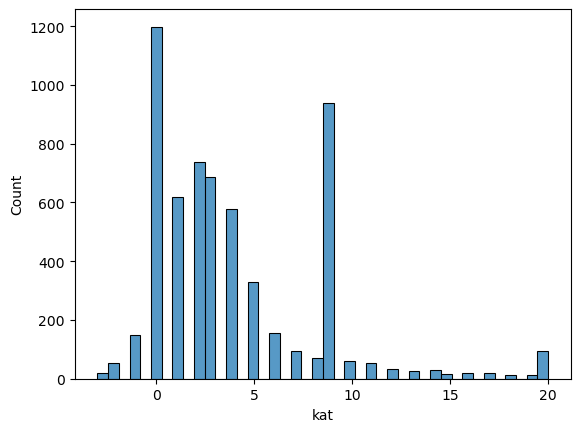

In [212]:
sea.histplot(df_raw['kat'])

<Axes: xlabel='oda_sayisi', ylabel='Count'>

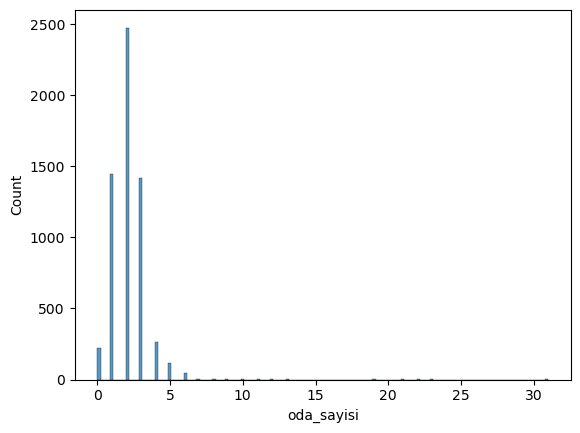

In [213]:
sea.histplot(df_raw['oda_sayisi'])

In [214]:
Q1 = df_raw['oda_sayisi'].quantile(0.25)
Q3 = df_raw['oda_sayisi'].quantile(0.75)
IOR= Q3-Q1
alt_sinir=Q1-1.5*IOR
ust_sinir=Q3+1.5*IOR
print(ust_sinir)

6.0


In [215]:
meann = int(df_raw['oda_sayisi'].mean())
df_raw['oda_sayisi']=df_raw['oda_sayisi'].apply(lambda x:meann if x > ust_sinir else x)


<Axes: ylabel='oda_sayisi'>

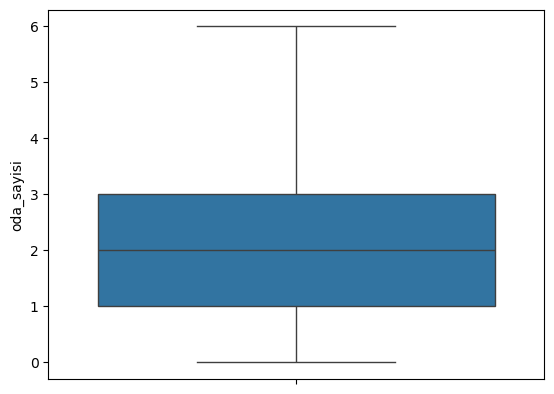

In [216]:
sea.boxplot(df_raw['oda_sayisi'])

<Axes: ylabel='banyo_mutfak_sayisi'>

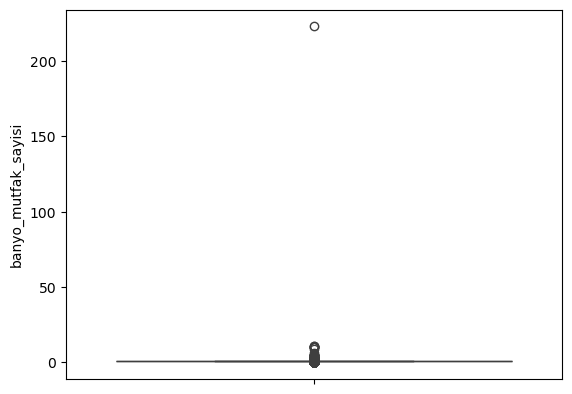

In [217]:
sea.boxplot(df_raw['banyo_mutfak_sayisi'])

In [218]:
Q1 = df_raw['banyo_mutfak_sayisi'].quantile(0.25)
Q3 = df_raw['banyo_mutfak_sayisi'].quantile(0.75)
ior=Q3-Q1
ust_sinir=Q3+1.5*ior
meann = int(df_raw['banyo_mutfak_sayisi'].mean())
df_raw['banyo_mutfak_sayisi']=df_raw['banyo_mutfak_sayisi'].apply(lambda x:meann if x > ust_sinir else x)

<Axes: xlabel='banyo_mutfak_sayisi', ylabel='Count'>

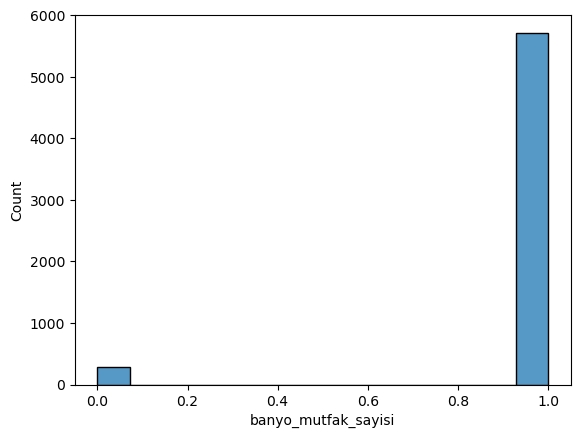

In [219]:
sea.histplot(df_raw['banyo_mutfak_sayisi'])

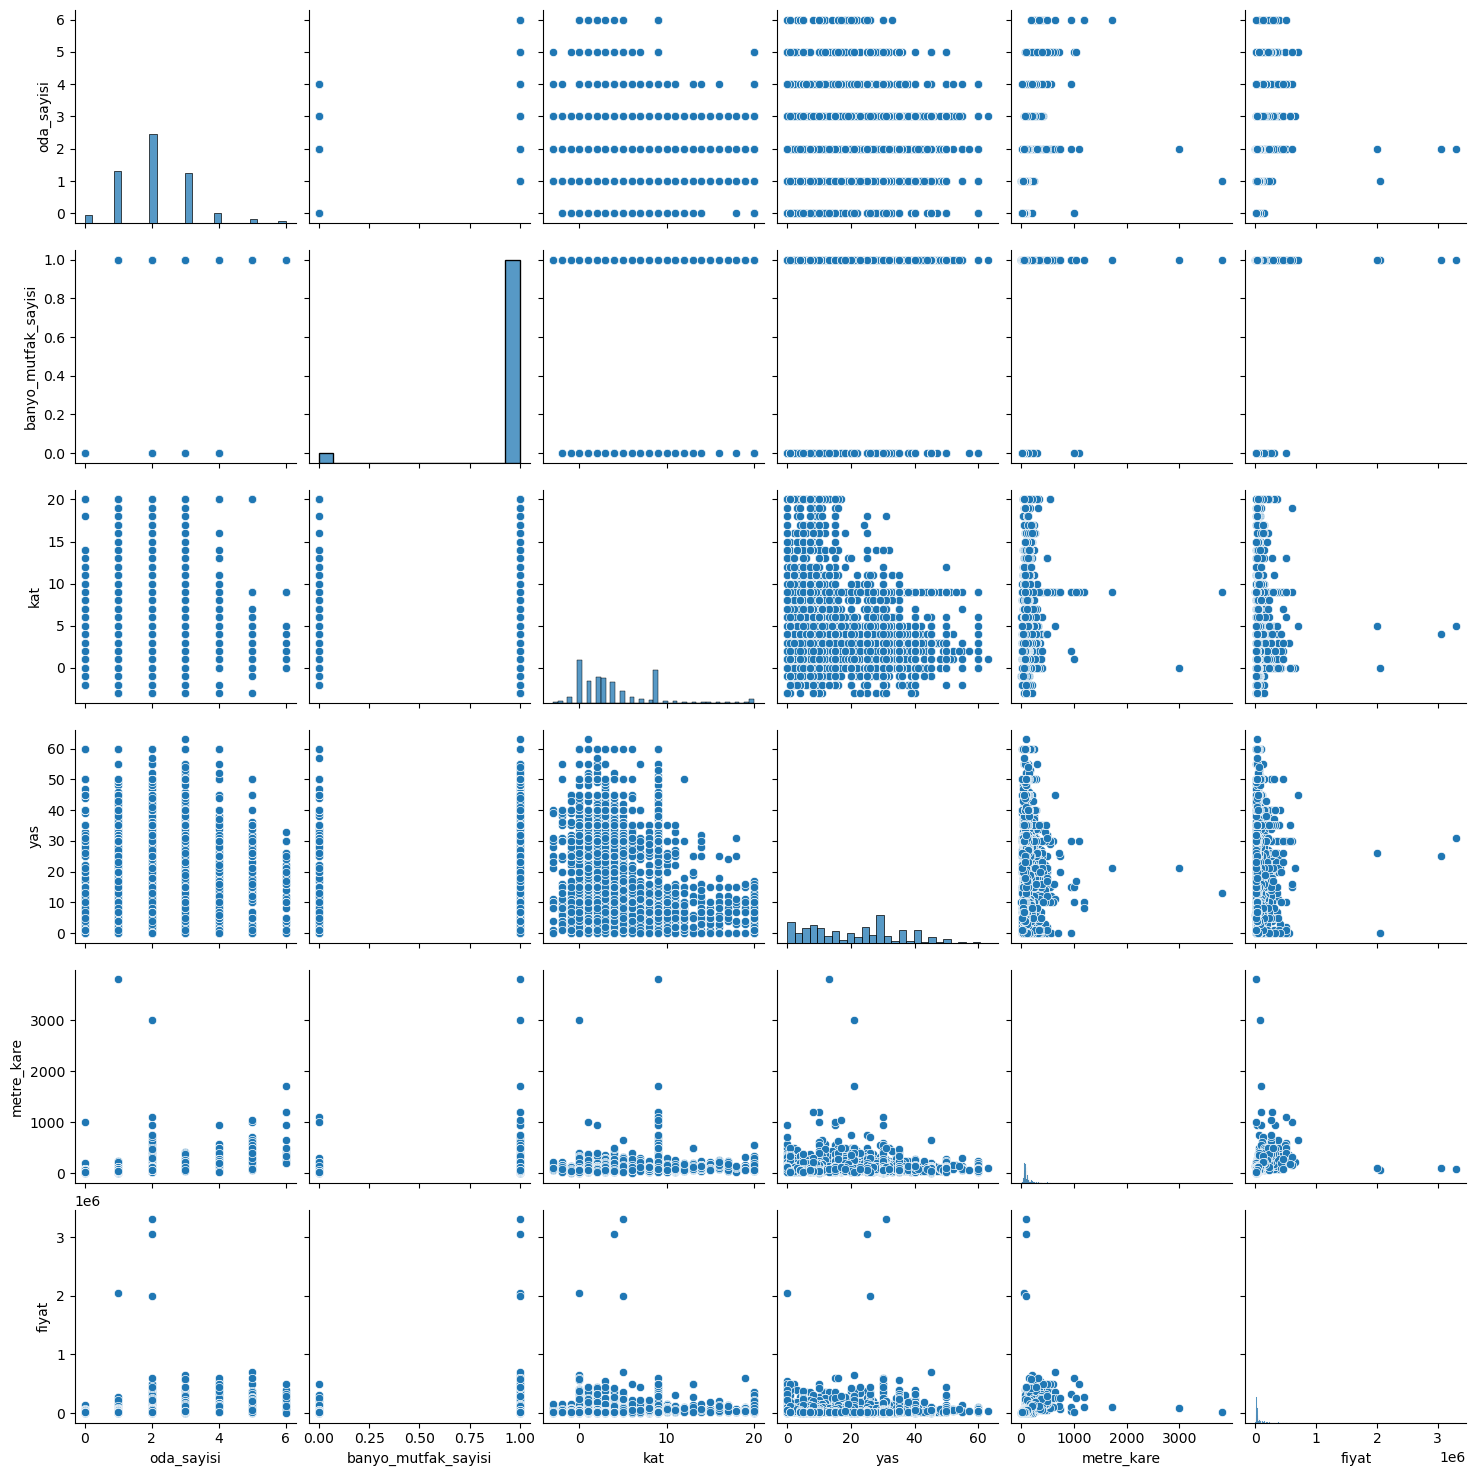

In [220]:
sea.pairplot(df_raw)

In [221]:
Q1 = df_raw['fiyat'].quantile(0.25)
Q3 = df_raw['fiyat'].quantile(0.75)
IOR = Q3-Q1
ust = Q3+1.5*IOR
print(ust)

95000.0


In [222]:
meann = int(df_raw['fiyat'].mean())
df_raw['fiyat']= df_raw['fiyat'].apply(lambda x:meann if x>ust else x)

In [223]:
Q1 = df_raw['metre_kare'].quantile(0.25)
Q3 = df_raw['metre_kare'].quantile(0.75)
IOR = Q3-Q1
ust = Q3+1.5*IOR
print(ust)

200.0


In [224]:
meann = int(df_raw['metre_kare'].mean())
df_raw['metre_kare']= df_raw['metre_kare'].apply(lambda x:meann if x>1.5*ust else x)

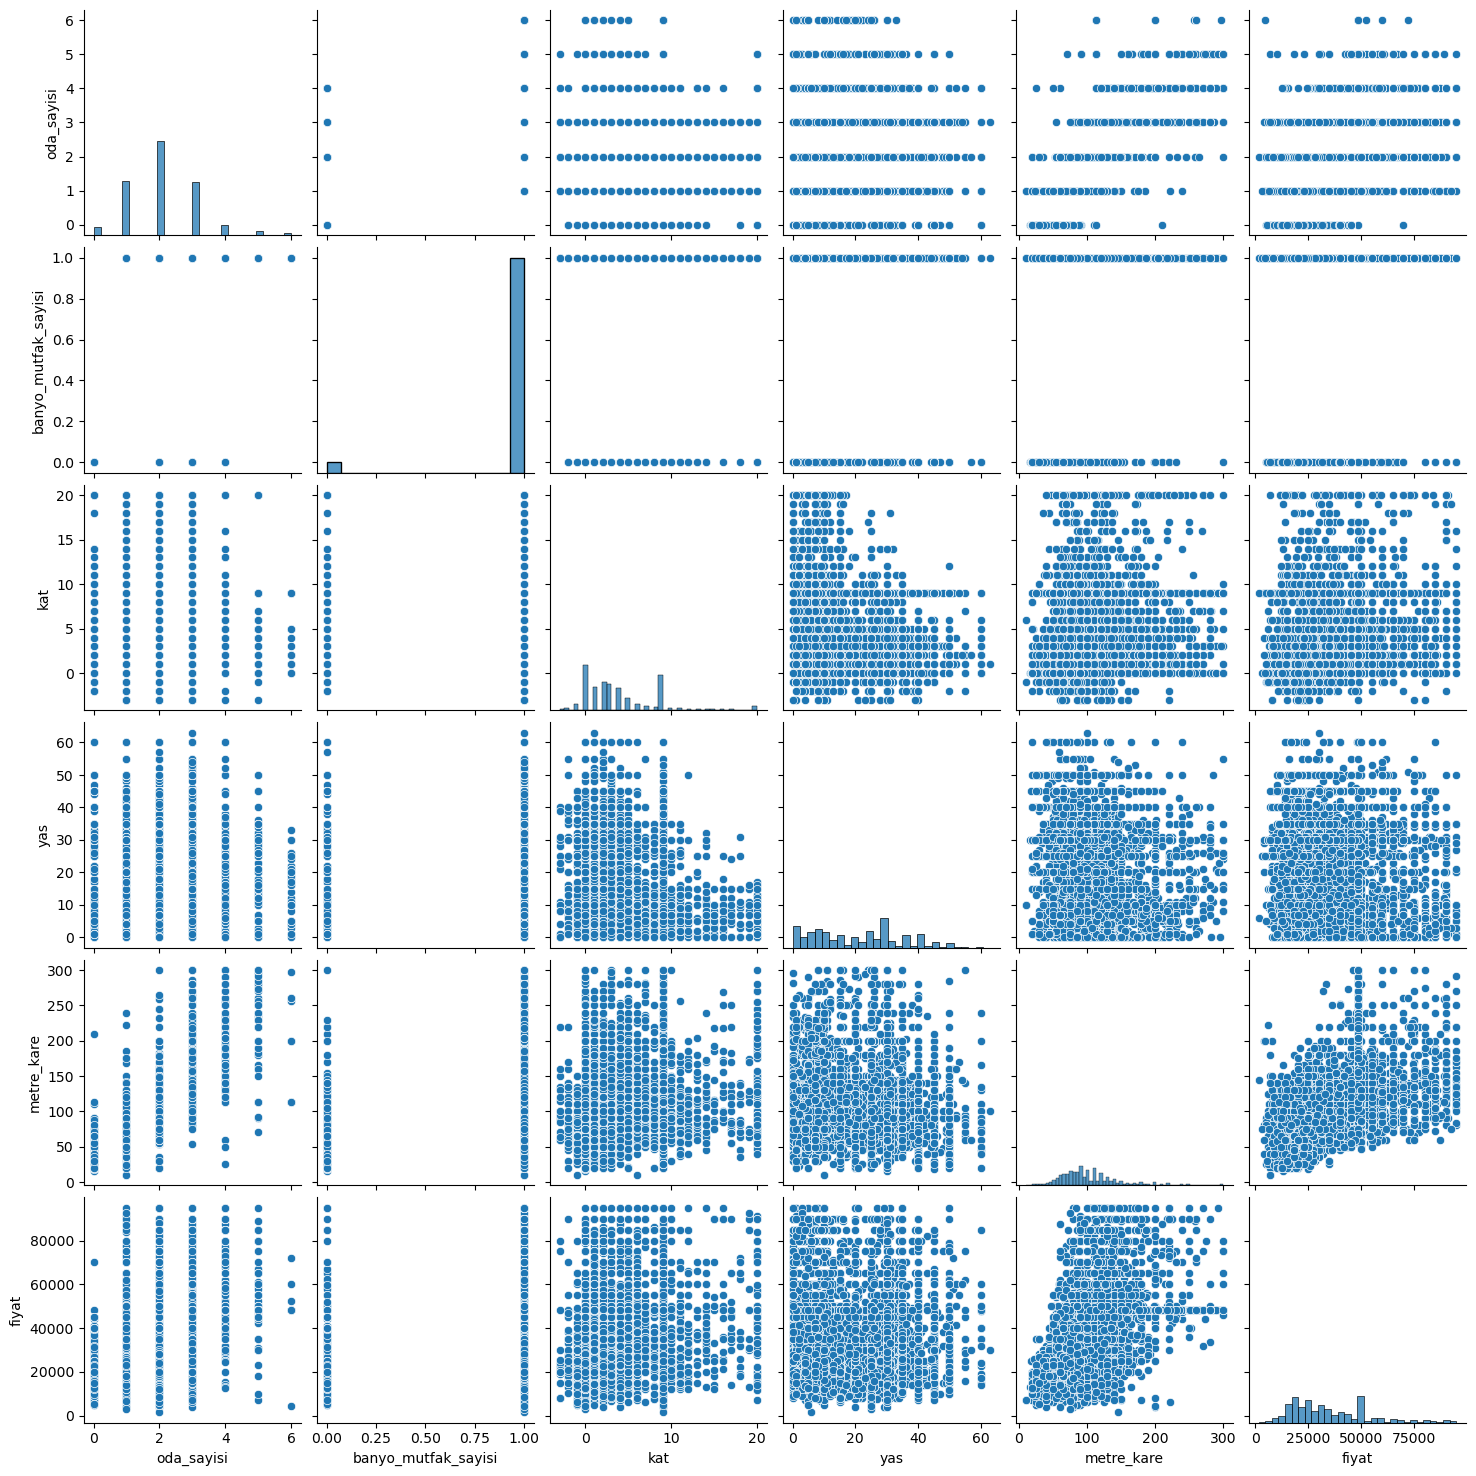

In [225]:
sea.pairplot(df_raw)

In [226]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006 entries, 0 to 6005
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   oda_sayisi           6006 non-null   int64 
 1   banyo_mutfak_sayisi  6006 non-null   int64 
 2   ilce                 6006 non-null   object
 3   mahalle              6006 non-null   object
 4   kat                  6006 non-null   int64 
 5   yas                  6006 non-null   int64 
 6   metre_kare           6006 non-null   int64 
 7   fiyat                6006 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 375.5+ KB


### veri standardizasyonu

In [251]:
df_cat = df_raw.select_dtypes(include=['object'])
df_num = df_raw.select_dtypes(include=['int64'])
df_num_col =df_raw.select_dtypes(include=['int64']).columns
df_cat_col = df_raw.select_dtypes(include=['object']).columns



In [252]:
df_num.sample(10)

,oda_sayisi,banyo_mutfak_sayisi,kat,yas,metre_kare,fiyat
1363,1,1,0,20,70,45000
2828,0,0,0,40,40,25000
2,1,1,1,0,75,29990
30,1,1,2,0,97,48477
5522,3,1,0,15,180,7000
2435,1,1,9,0,72,55000
2943,2,1,0,25,75,17000
1449,1,1,9,30,50,12000
2266,2,1,0,12,100,26500
2882,3,1,0,28,160,27500


In [245]:
df_cat.sample(10)

,ilce,mahalle
583,Beşiktaş,Ulus Mah.
233,Beşiktaş,Vişnezade Mah.
1567,Kağıthane,Ortabayır Mah.
998,Sancaktepe,Eyüp Sultan Mah.
5292,Şişli,Merkez Mah.
3904,Esenler,Fevzi Çakmak Mah.
1974,Maltepe,Altıntepe Mah.
1057,Beyoğlu,Hacımimi Mah.
2304,Kağıthane,Yahya Kemal Mah.
2955,Şişli,İzzet Paşa Mah.


In [253]:
scaler = StandardScaler()
df_num = scaler.fit_transform(df_num)

In [254]:
df_numeric = pd.DataFrame(df_num,columns=df_num_col)
df_numeric


,oda_sayisi,banyo_mutfak_sayisi,kat,yas,metre_kare,fiyat
0,2.795361,0.224835,0.000813,-1.026219,0.206962,0.751728
1,-1.053106,0.224835,0.931390,-1.459199,-0.306395,0.751728
2,-1.053106,0.224835,-0.697119,-1.459199,-0.641193,-0.263984
3,-0.090989,0.224835,-0.697119,-1.098383,-0.194795,-0.455731
4,0.871127,0.224835,1.396678,-1.242709,1.769353,0.751728
...,...,...,...,...,...,...
6001,-1.053106,0.224835,-1.162407,-1.387036,-1.310789,-0.922738
6002,-1.053106,0.224835,0.000813,-0.954056,-1.199189,-0.648028
6003,-2.015223,-4.447697,-0.929763,-1.098383,-1.868785,-1.224918
6004,-0.090989,0.224835,-0.929763,-0.954056,-0.975991,-0.812854


### kategorik değiskenlerin dönüstürülmesi

In [255]:
mean_rent_per_mahalle = df_raw.groupby('mahalle')['fiyat'].mean()
df_cat['mahalle_encoded'] = df_raw['mahalle'].map(mean_rent_per_mahalle)
df_cat.sample(5)

,ilce,mahalle,mahalle_encoded
5505,Fatih,Seyyid Ömer Mah.,19573.222222
857,Kağıthane,Çeliktepe Mah.,28171.875000
1058,Ataşehir,İçerenköy Mah.,31016.666667
4033,Çekmeköy,Nişantepe Mah.,31857.142857
1573,Zeytinburnu,Veliefendi Mah.,19000.000000


In [256]:
mean_rent_per_mahalle = df_raw.groupby('ilce')['fiyat'].mean()
df_cat['ilce_encoded'] = df_raw['ilce'].map(mean_rent_per_mahalle)
df_cat = pd.DataFrame(df_cat)
df_cat.head(10)

,ilce,mahalle,mahalle_encoded,ilce_encoded
0,Kadıköy,Caddebostan Mah.,58390.437500,51807.895317
1,Şişli,Teşvikiye Mah.,55275.962963,36914.394161
2,Bağcılar,15 Temmuz Mah.,25456.666667,22871.578947
3,Kağıthane,Sultan Selim Mah.,24758.088235,27052.448413
4,Zeytinburnu,Kazlıçeşme Mah.,48163.785714,36799.857143
5,Zeytinburnu,Kazlıçeşme Mah.,48163.785714,36799.857143
6,Beşiktaş,Ulus Mah.,48624.833333,48068.790244
7,Kağıthane,Çeliktepe Mah.,28171.875000,27052.448413
8,Sarıyer,Rumeli Hisarı Mah.,40992.333333,47652.710000
9,Beşiktaş,Levent Mah.,47238.500000,48068.790244


In [258]:
df_cat = pd.DataFrame(df_cat.select_dtypes('float'))

In [259]:
df_prepared = pd.concat([df_numeric,df_cat],axis=1) 
df_prepared.sample(10)

,oda_sayisi,banyo_mutfak_sayisi,kat,yas,metre_kare,fiyat,mahalle_encoded,ilce_encoded
787,-1.053106,0.224835,-0.929763,2.148969,-1.199189,-0.428260,39148.275000,37988.307937
4865,-0.090989,0.224835,2.792542,-0.160259,-0.105516,-0.538144,18272.727273,16901.390244
3027,1.833244,0.224835,-0.929763,0.777865,2.148791,0.835404,47600.000000,51807.895317
4806,-0.090989,0.224835,-0.464475,-1.170546,-0.752792,-0.373318,22559.909091,36914.394161
4267,3.757478,0.224835,1.164034,0.056231,0.206962,0.751728,48033.250000,38703.781818
755,1.833244,0.224835,0.000813,-0.593239,1.925592,0.751728,62571.833333,49134.357143
1311,0.871127,0.224835,-0.231831,2.870602,0.675680,0.835404,37453.194118,36914.394161
2100,-0.090989,0.224835,-0.929763,-0.737566,-0.261755,-1.087563,23086.538462,26617.567568
5052,0.871127,0.224835,1.164034,0.705701,0.809599,1.659533,37453.194118,36914.394161
4768,-1.053106,0.224835,-0.929763,-0.376749,-1.087590,-0.812854,20472.222222,32349.532710


### verinin eğitim ve test olarak ayırılması 